In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
datapath=r"/content/drive/MyDrive/brain_tumor_dataset"


In [5]:
import numpy as np
import os
import cv2

In [26]:
categories=["no",'yes']
data=[]

for cat in categories:
    path=os.path.join(datapath,cat)
    for img in os.listdir(path) :
        image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        image=cv2.resize(image,(32,32))
        data.append([image,0 if cat=='no' else 1])

    

In [27]:
import random
random.shuffle(data)


In [96]:
X=[]
y=[]
for img,label in data:
  X.append(img)
  y.append(label)
X=np.array(X).reshape(253,32,32,1)
y=np.array(y).reshape(-1,1)

In [97]:
X=X/255.0

In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [121]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.Resizing(40, 40),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(20,(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(40, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(40, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes,activation='relu')
])
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [122]:
model.fit(X,y, epochs=50,verbose=2)


Epoch 1/50
8/8 - 1s - loss: 3.3858 - accuracy: 0.4190
Epoch 2/50
8/8 - 0s - loss: 1.1824 - accuracy: 0.4150
Epoch 3/50
8/8 - 0s - loss: 0.7388 - accuracy: 0.3992
Epoch 4/50
8/8 - 0s - loss: 0.7056 - accuracy: 0.4111
Epoch 5/50
8/8 - 0s - loss: 0.7164 - accuracy: 0.5771
Epoch 6/50
8/8 - 0s - loss: 0.7099 - accuracy: 0.5573
Epoch 7/50
8/8 - 0s - loss: 0.6662 - accuracy: 0.5415
Epoch 8/50
8/8 - 0s - loss: 0.6745 - accuracy: 0.4901
Epoch 9/50
8/8 - 0s - loss: 0.6785 - accuracy: 0.4545
Epoch 10/50
8/8 - 0s - loss: 0.6730 - accuracy: 0.4269
Epoch 11/50
8/8 - 0s - loss: 0.6839 - accuracy: 0.4545
Epoch 12/50
8/8 - 0s - loss: 0.7071 - accuracy: 0.4862
Epoch 13/50
8/8 - 0s - loss: 0.6768 - accuracy: 0.4980
Epoch 14/50
8/8 - 0s - loss: 0.6793 - accuracy: 0.4545
Epoch 15/50
8/8 - 0s - loss: 0.6859 - accuracy: 0.4625
Epoch 16/50
8/8 - 0s - loss: 0.6744 - accuracy: 0.5534
Epoch 17/50
8/8 - 0s - loss: 0.6745 - accuracy: 0.5099
Epoch 18/50
8/8 - 0s - loss: 0.6791 - accuracy: 0.4980
Epoch 19/50
8/8 - 0

In [128]:
y_pred=model.predict(X[200:240])

In [129]:
y_pred=[np.argmax(i) for i in y_pred]

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
cm=confusion_matrix(y_pred,y[200:240])

In [135]:
import seaborn as sn

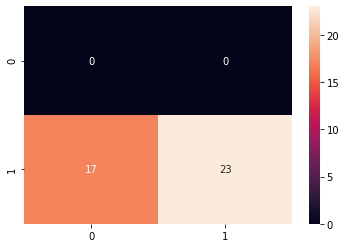

In [136]:
sn.heatmap(cm,annot=True,fmt='d')

# this is complete disaster

# lets use logistic regression for classification

In [146]:
x_train=[]
labels=[]
for img,label in data:
  x_train.append(img)
  labels.append(label)
x_train=np.array(x_train)
labels=np.array(labels)

In [154]:
x_train=x_train.reshape(253,32*32)

In [156]:
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x_train,labels,test_size=0.2,random_state=0)

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
model=LogisticRegression()

In [161]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
model.score(x_test,y_test)

0.7058823529411765

In [164]:
y_pred=model.predict(x_test)

In [165]:
y_pred[:10]

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [166]:
y_test[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [167]:
cm2=confusion_matrix(y_pred,y_test)

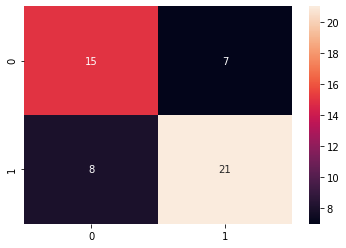

In [168]:
sn.heatmap(cm2,annot=True,fmt='d')

#  even though we have small dataset logistic regression works really well compare to neural networks
# we can also use various data imbalance handling techniques (like SMOTE,focal loss,duplication,ensamble method)  to improve model accuracy or hyper parameter tunning to select best fit model

